In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import random
import icecream as ic # for debugging

In [104]:
def small_world_network(n, k, p):
    # create a cycle graph
    G = nx.Graph()
    for i in range(n):
        G.add_edge(i, (i+1)%n)
    
    # expand a cycle graph
    half_k = k // 2
    for i in range(n):
        for j in range(1, half_k+1):
            G.add_edge(i, (i+j) % n)  
            G.add_edge(i, (i-j) % n)
    
    # rewire edges in graph
    edges = list(G.edges())
    num_edges = len(edges)
    num_edges = len(edges)
    num_rewire = int(num_edges * p)

    for edge in random.sample(edges, num_rewire):
        u, v = edge
        G.remove_edge(u, v)
    
        # define a direction of rewiring
        if random.random() < 0.5:
            new_u = u
            new_v = random.choice([node for node in G.nodes() if node != u and not G.has_edge(u, node)])
        else:
            new_v = v
            new_u = random.choice([node for node in G.nodes() if node != v and not G.has_edge(node, v)])

        G.add_edge(new_u, new_v)
    
    return G

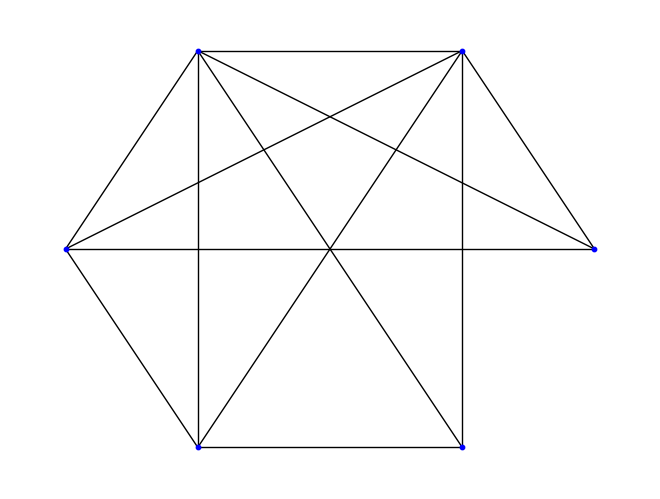

In [105]:
G = small_world_network(6, 4, 0.5)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, node_size=10, node_color='blue')
plt.show()

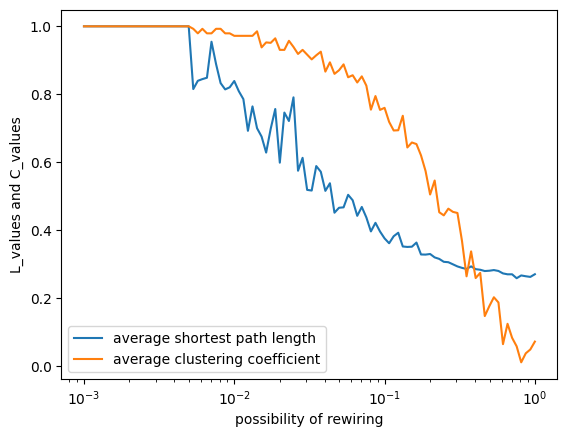

In [123]:
n = 100
k = 4

# i*10**(-j)
# create figure of L(p)-p, C(p)-p
# p_value = []
# for j in range(1, 10):
#     for i in np.arange(1, 10):
#         p_value.append(i*10**(-j))

p_value = np.logspace(-3, 0, num=100)
L_value = []
C_value = []

for p in p_value:
    G = small_world_network(n, k, p)
    # calculate the path of each of the subgraphs (or connected component) and store them in path_temp
    path_temp = []
    for subgraph in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        path_temp.append(nx.average_shortest_path_length(subgraph))
    # create a variable weight that holds the size of each subgraph (or connected component)
    # alternatively I have weighted by graph size but we could use anything to weight the average
    weights = []
    for components in nx.connected_components(G):
        weights.append(len(components))
    # compute the weighted average
    avg_shotest_path = np.average(path_temp,weights = weights) 
    avg_cluster = nx.average_clustering(G)
    L_value.append(avg_shotest_path)
    C_value.append(avg_cluster)

x = p_value
plt.plot(x, np.array(L_value)/L_value[0], label="average shortest path length")
plt.plot(x, np.array(C_value)/C_value[0], label="average clustering coefficient")
plt.xscale("log")
plt.xlabel("possibility of rewiring")
plt.ylabel("L_values and C_values")
plt.legend()
plt.show()

[このサブグラフの内容](https://groups.google.com/g/networkx-discuss/c/mp5AEebIeKo)を参考にすると解決するかも
張り替えを繰り返していくうちにグラフは離れていって部分的なグラフのサブグラフを形成する可能性がある。その場合それをまとめて平均経路長などを求めることはできないので、サブグラフごとに経路長の合計を求めて、それを全て足した後に全体のノード数で割ると求まる、みたいなことを言ってるっぽい

# TODO
平均経路長が変化しないのはなぜ？そもそもあってる？
-> 平均経路長を計算する式を見てみる。その中に張り替えの途中で変化するパラメータが含まれていないなら変化しない可能性もある

In [114]:
ic.ic(1e-3, 2.5e-3)

i = 3
ic.ic(1*10**(-i))

ic| 0.001, 0.0025
ic| 1*10**(-i): 0.001


0.001